## Assignment - Advanced Regression

## Problem Statement - Part 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Company wants to know:
    1. Which variables are significant in predicting the price of a house?
    2. How well those variables describe the price of a house?

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

We will follow the following trail to get the result:

## Contents
    1. Importing Libraries
    2. Reading and Understanding data
        - reading data
        - dimentions check
        - info check
        - null check
        - describing the statistical summary of the DS
    3. Data cleaning
        - checking for nulls
        - deleting columns having more than 15% nulls
        - check for unique values less than 2
        - dropping 'ID' of the dataset
        - dropping records containing the missing values
    4. Data Preparation
    5. Perform EDA
    6. Create Dummy Variables
    7. Data Prep and Modelling
    8. Coming to Conclusion


## Importing Libraries 

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings("ignore")
%matplotlib inline

## Reading And Understanding The Data

In [124]:
# reading the data set
houseDf = pd.read_csv("train.csv")
houseDf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [125]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> Shape Of The Dataset")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(houseDf.shape)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> Info Of The Dataset")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(houseDf.info())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> Shape Of The Dataset
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(1460, 81)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> Info Of The Dataset
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-

## Checking Null Values

In [126]:
houseDf.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

### We have some of the null values

In [127]:
houseDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [128]:
print(houseDf.isnull().all(axis=0))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> Entire Row Null Values")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
houseDf[(houseDf.isnull().all(axis=1) == True)]

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> Entire Row Null Values
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [129]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> Entire Column Null Values")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
houseDf.isnull().all(axis=0).sum()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> Entire Column Null Values
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0

##### There is no entire row or entire column null values

## Checking for the null values having count > 0on each columns

In [130]:
houseDf.isnull().sum()[(houseDf.isnull().sum()>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### null value percentage which is greater than zero

In [131]:
round(100*houseDf.isnull().sum()[(houseDf.isnull().sum()>0)]/len(houseDf), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

### Cleaning the columns where null value percentage greater than 85% Alley,PoolQC,MiscFeature

1. According to the data dictionary Alley - NA = No Alley access and it has around 94%, so it can be considered as a single value and dropped
2. PoolQC column NA = No pool. Since it has 99.52% null values we can consider it as single value and hence dropped.
3. MiscFeature is having 96.30% null values, hence we'll consider it as single value and it can be removed.

In [132]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> Alley Value Count")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(houseDf["Alley"].value_counts())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> PoolQC Value Count")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(houseDf["PoolQC"].value_counts())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("--> MiscFeature Value Count")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(houseDf["MiscFeature"].value_counts())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> Alley Value Count
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Grvl    50
Pave    41
Name: Alley, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> PoolQC Value Count
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--> MiscFeature Value Count
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [133]:
houseDf.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)
houseDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


### Checking Value counts for each column

In [134]:
for col in houseDf:
    print(col + " value counts: ")
    print(houseDf[col].value_counts(), "\n\n")

Id value counts: 
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64 


MSSubClass value counts: 
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 


MSZoning value counts: 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 


LotFrontage value counts: 
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 


LotArea value counts: 
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 


Street value counts: 
Pave    1454
Grvl       6
Name:

### We can delete those columns which is having more than 90% has the same value

In [135]:
#90% of total data
1460*90/100

1314.0

## Checking For Duplicate Records

In [136]:
print(houseDf.shape)

#check the duplicate records
print(houseDf.duplicated(subset=None, keep='first').count())

houseDf[houseDf.duplicated(keep=False)]

(1460, 78)
1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


- No duplicate records found!
- houseDf data shape also has only 1460 rows so it is obseved that there is no duplicate records.

### Delete the columns which represents the 90% most values.

In [137]:
columnList = []   
for col in (houseDf):
    if(houseDf[col].value_counts().max() >= 1314):
        columnList.append(col)


# Remove the columns with skewed data
print(columnList)
houseDf.drop(columnList, axis = 1, inplace = True)

houseDf.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


- As these columns has maximum value percentage has 90% we can see some skewness in the data if it is there in the dataset. Hence those can be dropped.
- We can also drop ID column as there is no use if it.

In [138]:
houseDf.drop("Id", axis=1, inplace=True)
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


### Checking the null value percentage after removing the columns

In [139]:
round(100*houseDf.isnull().sum()[(houseDf.isnull().sum() > 0)]/len(houseDf), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

# EDA

In [140]:
# impute the value to fence column
houseDf["Fence"] = houseDf["Fence"].astype('str')
houseDf["Fence"] = houseDf["Fence"].str.replace("nan", "No Fence")

print(houseDf["Fence"].describe())
print(houseDf["Fence"].value_counts())

count         1460
unique           5
top       No Fence
freq          1179
Name: Fence, dtype: object
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


In [141]:
# impute the value to nullable rows for GarageFinish
houseDf["GarageFinish"] = houseDf["GarageFinish"].fillna("No Garage")

In [142]:
# imputting values to LotFrontage
print(houseDf["LotFrontage"].describe())
print(houseDf["LotFrontage"].value_counts())
houseDf["LotFrontage"] = houseDf["LotFrontage"].replace(np.nan, houseDf["LotFrontage"].median())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

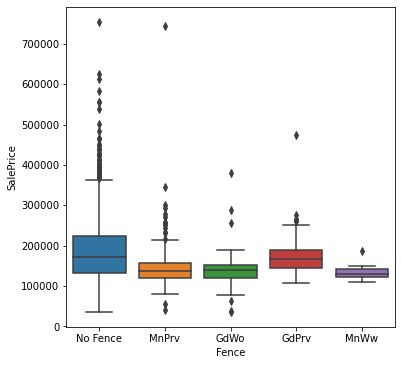

In [143]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data= houseDf)

80% of data does not contain fence

### Analysing and imputing basement related columns

In [144]:
houseDf["BsmtQual"] = houseDf["BsmtQual"].fillna("None")
houseDf["BsmtQual"].value_counts()
houseDf["BsmtQual"].value_counts()/len(houseDf)*100

TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64

In [145]:
houseDf["BsmtCond"] = houseDf["BsmtCond"].fillna("None")
houseDf["BsmtCond"].value_counts()
houseDf["BsmtCond"].value_counts()/len(houseDf)*100

TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64

In [146]:
houseDf["BsmtExposure"] = houseDf["BsmtExposure"].fillna("None")
houseDf["BsmtExposure"].value_counts()
houseDf["BsmtExposure"].value_counts()/len(houseDf)*100

No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64

In [147]:
houseDf["BsmtFinType1"] = houseDf["BsmtFinType1"].fillna("None")
houseDf["BsmtFinType1"].value_counts()
houseDf["BsmtFinType1"].value_counts()/len(houseDf)*100

Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64

In [148]:
houseDf["BsmtFinType2"] = houseDf["BsmtFinType2"].fillna("None")
houseDf["BsmtFinType2"].value_counts()
houseDf["BsmtFinType2"].value_counts()/len(houseDf)*100

Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64

In [149]:
# basement columns:
house_Basement = houseDf[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

house_Basement

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,Unf,706,0,150,856
1,Gd,TA,Gd,ALQ,Unf,978,0,284,1262
2,Gd,TA,Mn,GLQ,Unf,486,0,434,920
3,TA,Gd,No,ALQ,Unf,216,0,540,756
4,Gd,TA,Av,GLQ,Unf,655,0,490,1145
...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,0,0,953,953
1456,Gd,TA,No,ALQ,Rec,790,163,589,1542
1457,TA,Gd,No,GLQ,Unf,275,0,877,1152
1458,TA,TA,Mn,GLQ,Rec,49,1029,0,1078


<Figure size 1440x864 with 0 Axes>

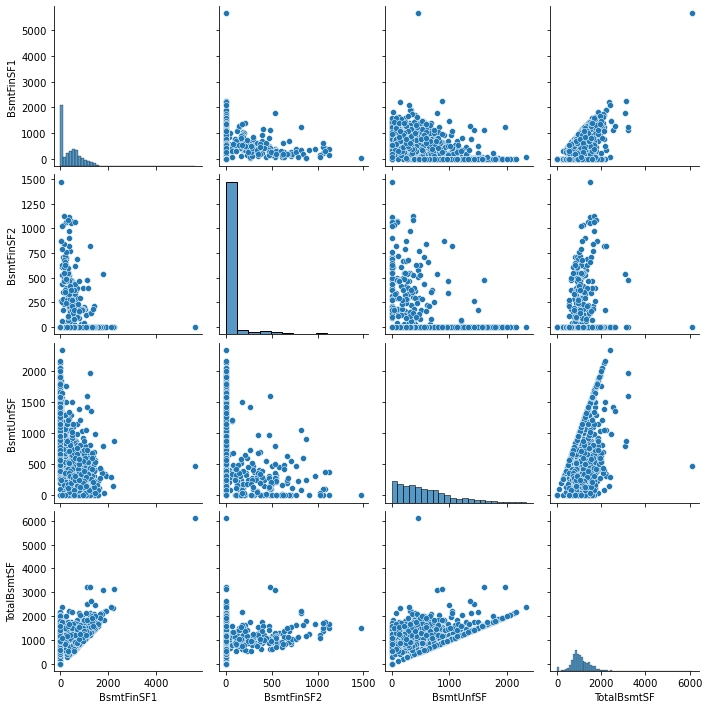

In [150]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(house_Basement)
plt.show()

##### From the plot we can observe that we can drop "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"

- Plotting the box plots remaining basement related columns to see the effect of those features with the target variable Sales price

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

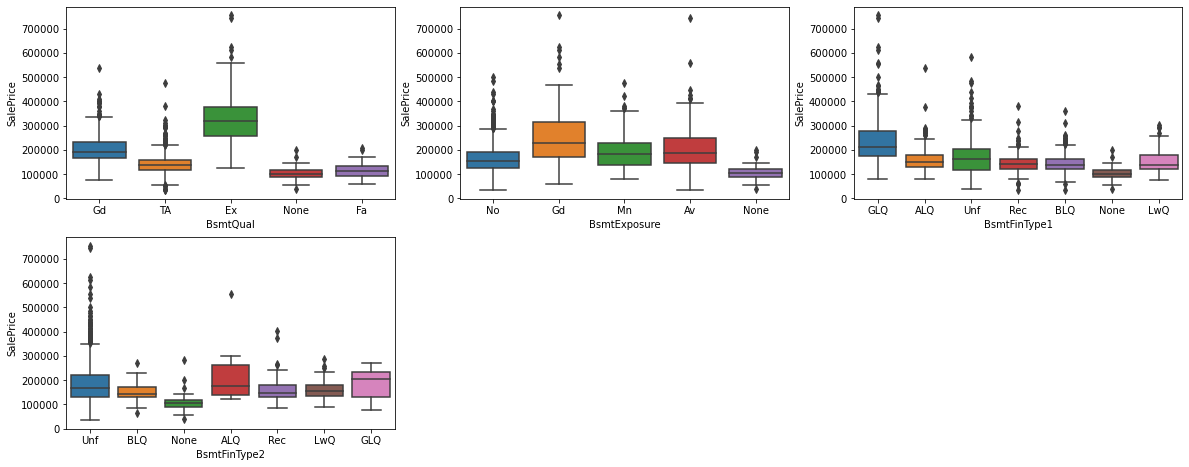

In [151]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = houseDf)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = houseDf)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = houseDf)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = houseDf)

##### We can drop BsmtFinType2, BsmtFinType1, BsmtExposure as they dont have much influence on sales price.

- Dropping some of the basement related columns as they don't show much influence with the target variable

In [152]:
# drop the columns

basementColList = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
houseDf.drop(basementColList, axis=1, inplace=True)

# checking shape of house price data set after dropping basement variables

houseDf.shape

(1460, 53)

In [153]:
# imputting ManVnrArea column null values
houseDf["MasVnrArea"] = houseDf["MasVnrArea"].replace(np.nan, houseDf["MasVnrArea"].median())
houseDf["MasVnrArea"] = houseDf["MasVnrArea"].astype('int')

In [154]:
# checking for the remaining null values in data set

round(100*houseDf.isnull().sum()[(houseDf.isnull().sum()>0)]/len(houseDf), 2)

MasVnrType      0.55
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

#### Analysing Garage Columns

In [155]:
# GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond

houseDf["GarageYrBlt"] = houseDf["GarageYrBlt"].fillna(0)
houseDf["GarageType"] = houseDf["GarageType"].astype('str')
houseDf["GarageType"] = houseDf["GarageType"].str.replace("nan", "No Garage")
print(houseDf["GarageType"].describe())
print(houseDf["GarageType"].value_counts())
houseDf["GarageType"].value_counts()/len(houseDf['GarageType'])*100
houseDf["GarageYrBlt"].value_counts()/len(houseDf["GarageYrBlt"])*100

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64


0.0       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: GarageYrBlt, Length: 98, dtype: float64

In [156]:
print(houseDf["GarageQual"].value_counts())
print(houseDf["GarageQual"].describe())
houseDf["GarageQual"] = houseDf["GarageQual"].str.replace("nan", "No Garage")
print(houseDf["GarageQual"].value_counts()/len(houseDf["GarageQual"])*100)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64


###### it almost contains 90% of TA value in GargeQual so we can remove that column

In [157]:
print(houseDf["GarageFinish"].value_counts())
print(houseDf["GarageFinish"].value_counts()/len(houseDf["GarageFinish"])*100)

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64


##### Plotting garage related columns with the target variable Sales price

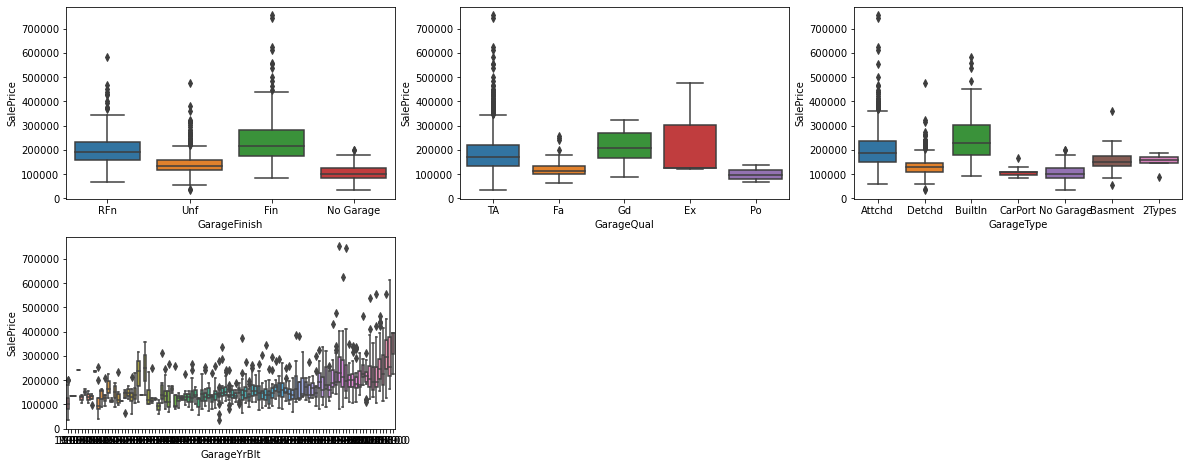

In [158]:
plt.figure(figsize=(20,12))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data= houseDf)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data=houseDf)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data=houseDf)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt', y = 'SalePrice', data= houseDf)
plt.show()

- From the plots plotted above and value_counts calculation GarageQual, MasVnrArea are less influence variables. So we can drop them

In [159]:
houseDf.drop("GarageQual", axis=1, inplace= True)
houseDf.shape

(1460, 52)

In [160]:
houseDf.drop("MasVnrArea", axis=1, inplace= True)
houseDf.shape

(1460, 51)

## Fireplace column

In [161]:
houseDf["FireplaceQu"] = houseDf["FireplaceQu"].fillna("No Fireplace")
houseDf["FireplaceQu"].head(20)

0     No Fireplace
1               TA
2               TA
3               Gd
4               TA
5     No Fireplace
6               Gd
7               TA
8               TA
9               TA
10    No Fireplace
11              Gd
12    No Fireplace
13              Gd
14              Fa
15    No Fireplace
16              TA
17    No Fireplace
18    No Fireplace
19    No Fireplace
Name: FireplaceQu, dtype: object

#### Analysing and imputing MasVnrType

In [162]:
houseDf["MasVnrType"] = houseDf["MasVnrType"].fillna("None")
houseDf["MasVnrType"].value_counts()/len(houseDf["MasVnrType"])*100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [163]:
round(100*houseDf.isnull().sum()[(houseDf.isnull().sum()>0)]/len(houseDf), 2)

Series([], dtype: float64)

#### Now there is no nullable columns and rows

### Lets check the shape of the data

In [164]:
houseDf.shape

(1460, 51)

In [165]:
# Correlation map to see how features are correlated with SalePrice
corrmat = houseDf.corr()
print(corrmat)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098   

<AxesSubplot:>

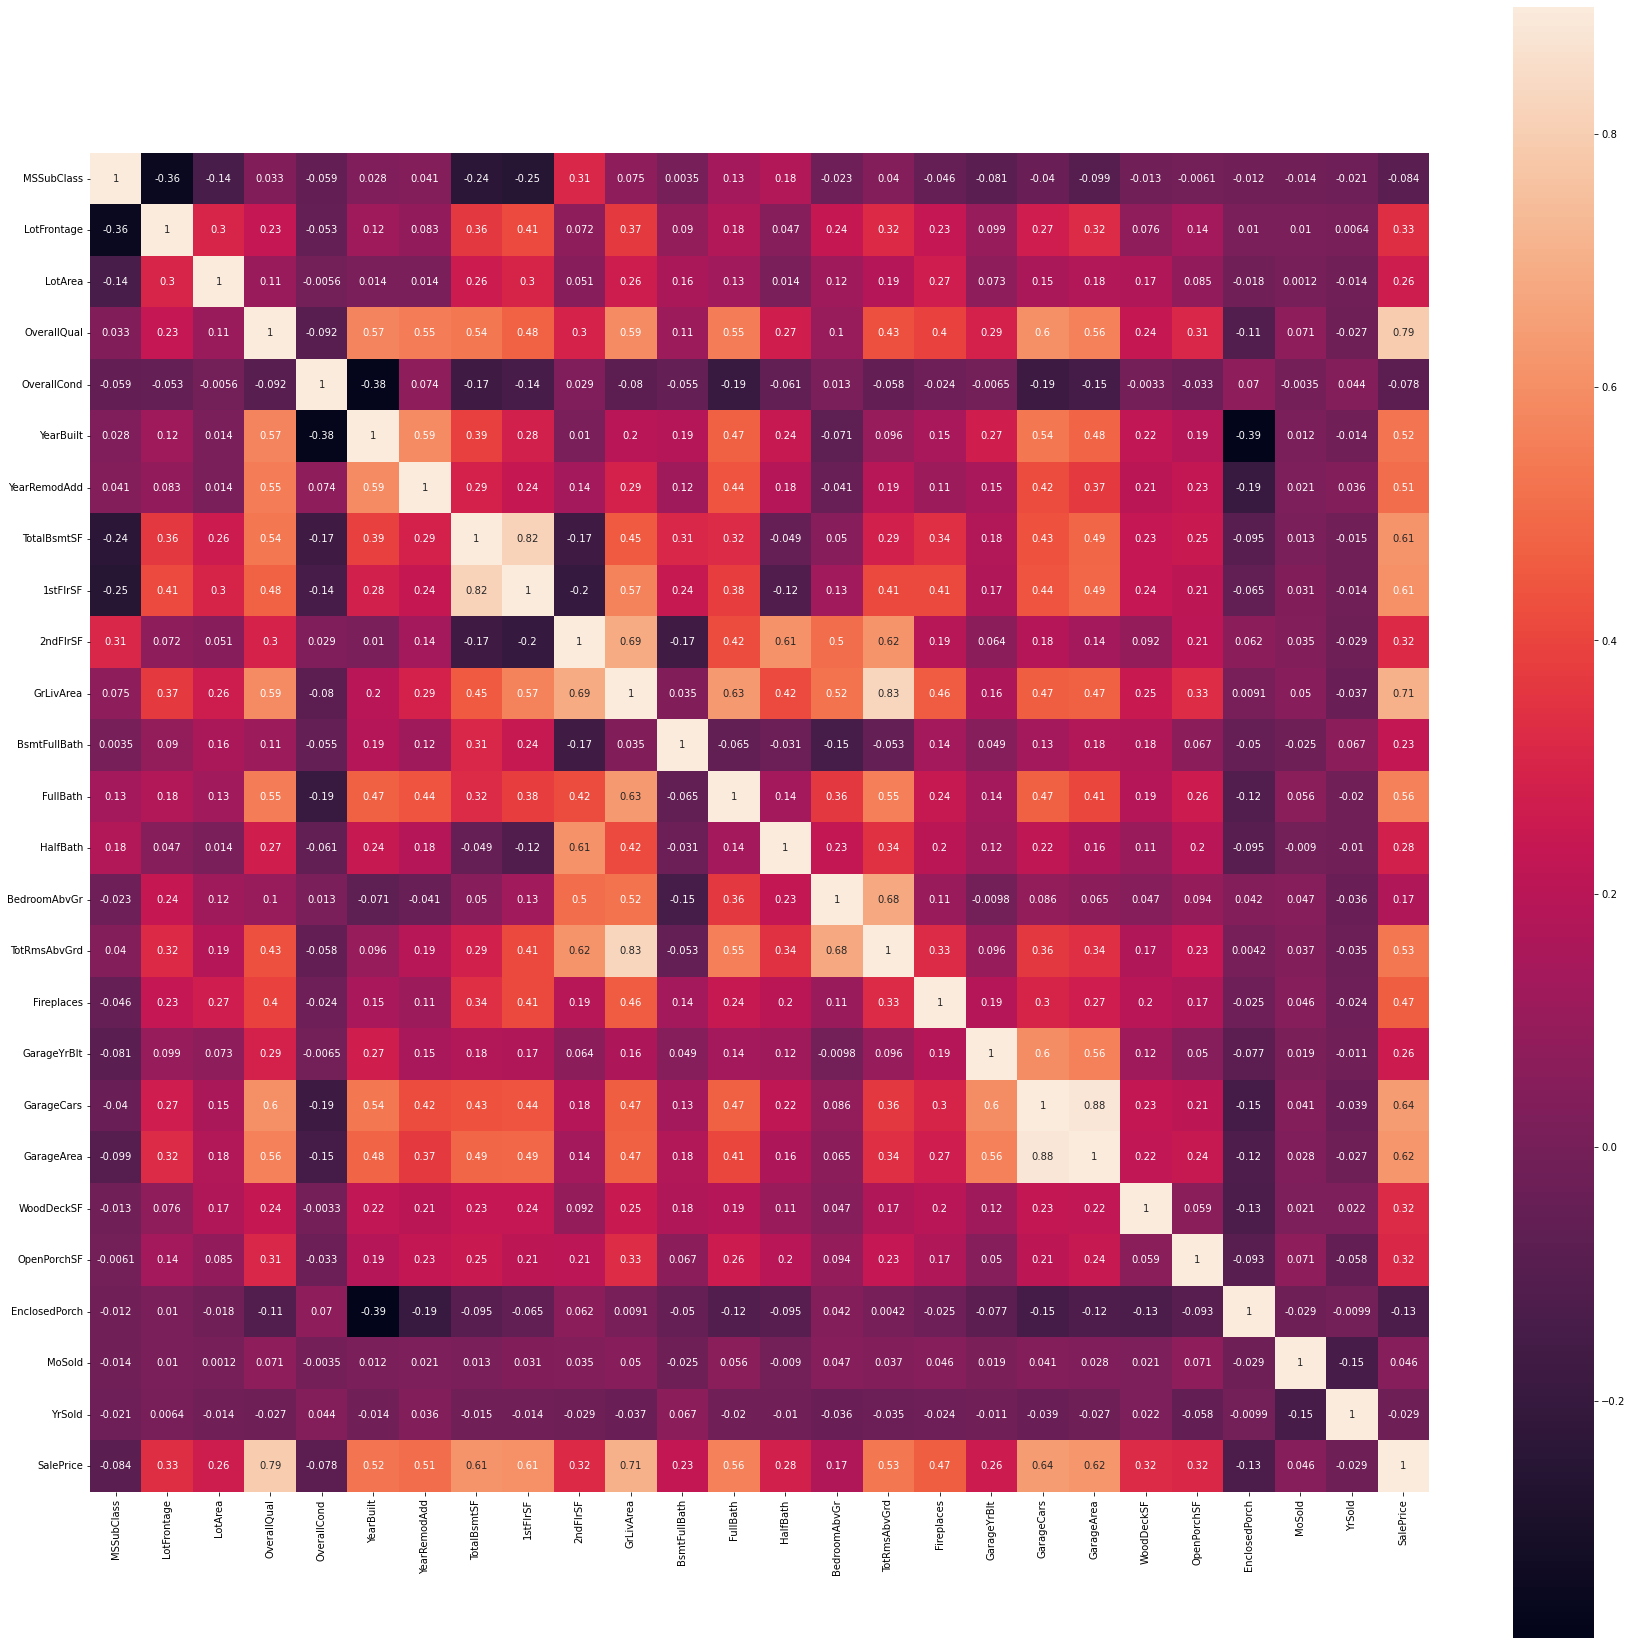

In [166]:
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [167]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and above

houseDf.describe(percentiles=[.25,.50,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,92.0,104.00,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,1602.2,1753.00,2155.05,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,1680.0,1831.25,2219.46,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,954.2,1141.05,1418.92,2065.0


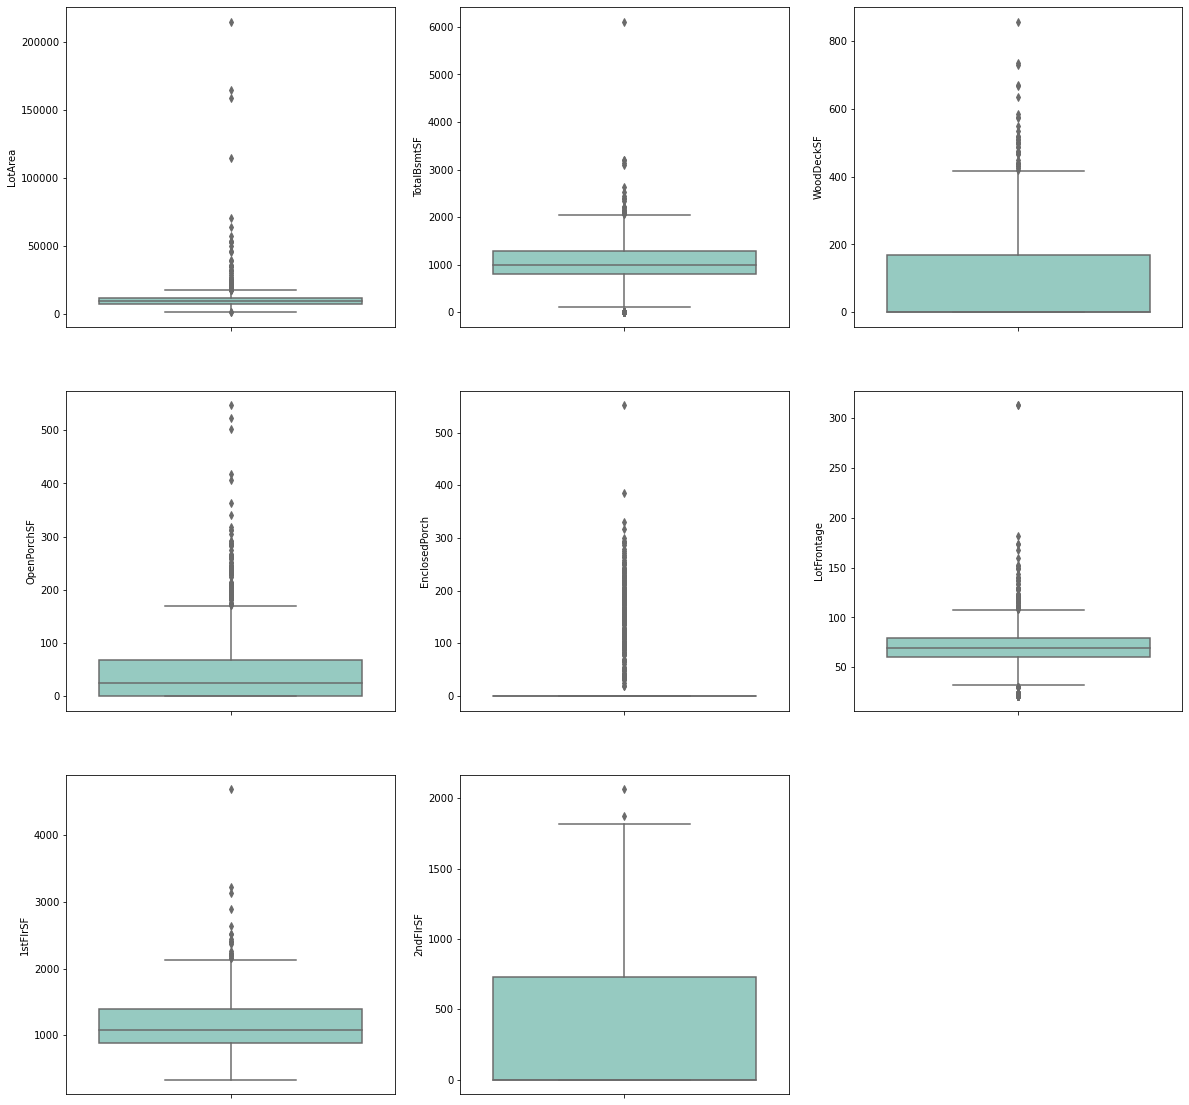

In [168]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = houseDf)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = houseDf)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = houseDf)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = houseDf)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = houseDf)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = houseDf)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = houseDf)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = houseDf)

plt.show()

In [169]:
# Removing Outliers

# removing values beyond 99% for LotArea
houseDf = houseDf[houseDf["LotArea"] < houseDf["LotArea"].quantile(0.99)]

# removing values beyond 99% for TotalBsmtSF
houseDf = houseDf[houseDf["TotalBsmtSF"] < houseDf["TotalBsmtSF"].quantile(0.99)]

# removing values beyond 99% for WoodDeckSF
houseDf = houseDf[houseDf["WoodDeckSF"] < houseDf["WoodDeckSF"].quantile(0.99)]

# removing values beyond 99% for OpenPorchSF
houseDf = houseDf[houseDf["OpenPorchSF"] < houseDf["OpenPorchSF"].quantile(0.99)]

# removing values beyond 99% for OpenPorchSF
houseDf = houseDf[houseDf["OpenPorchSF"] < houseDf["OpenPorchSF"].quantile(0.99)]

houseDf.shape

(1386, 51)

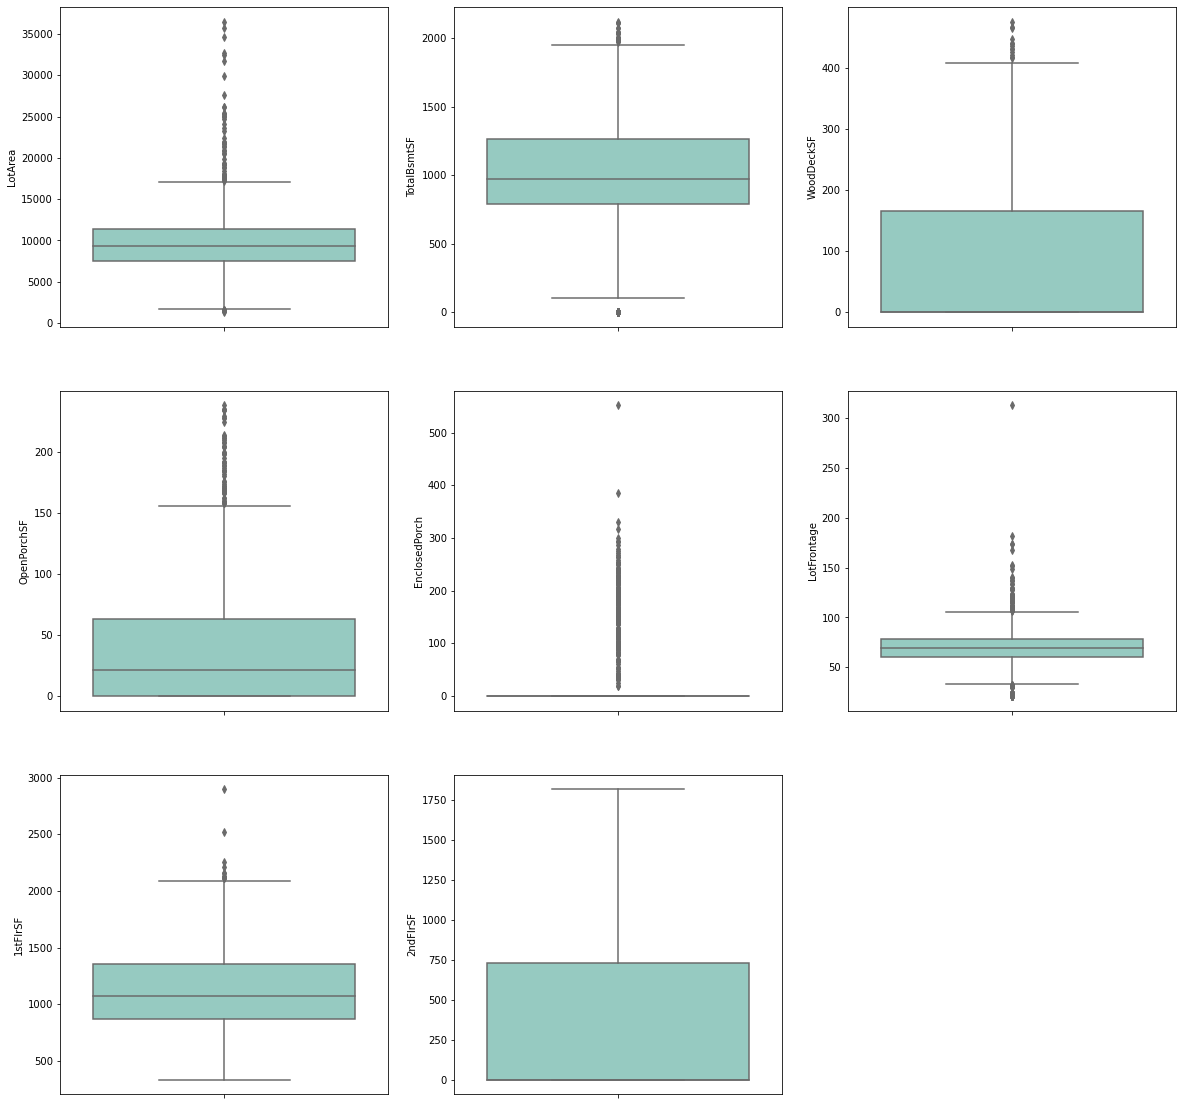

In [170]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = houseDf)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = houseDf)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = houseDf)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = houseDf)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = houseDf)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = houseDf)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = houseDf)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = houseDf)

plt.show()

In [171]:
# Determine the percentage of data retained after removing the outliers
num_data = round(100*(len(houseDf)/1460), 2)
print(num_data)

94.93


# Data Visualization

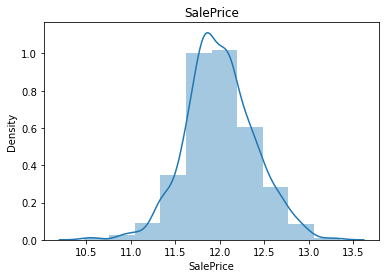

In [172]:
# transform the sales price
houseDf["SalePrice"] = np.log1p(houseDf["SalePrice"])

plt.title('SalePrice')
sns.distplot(houseDf['SalePrice'], bins=10)
plt.show()

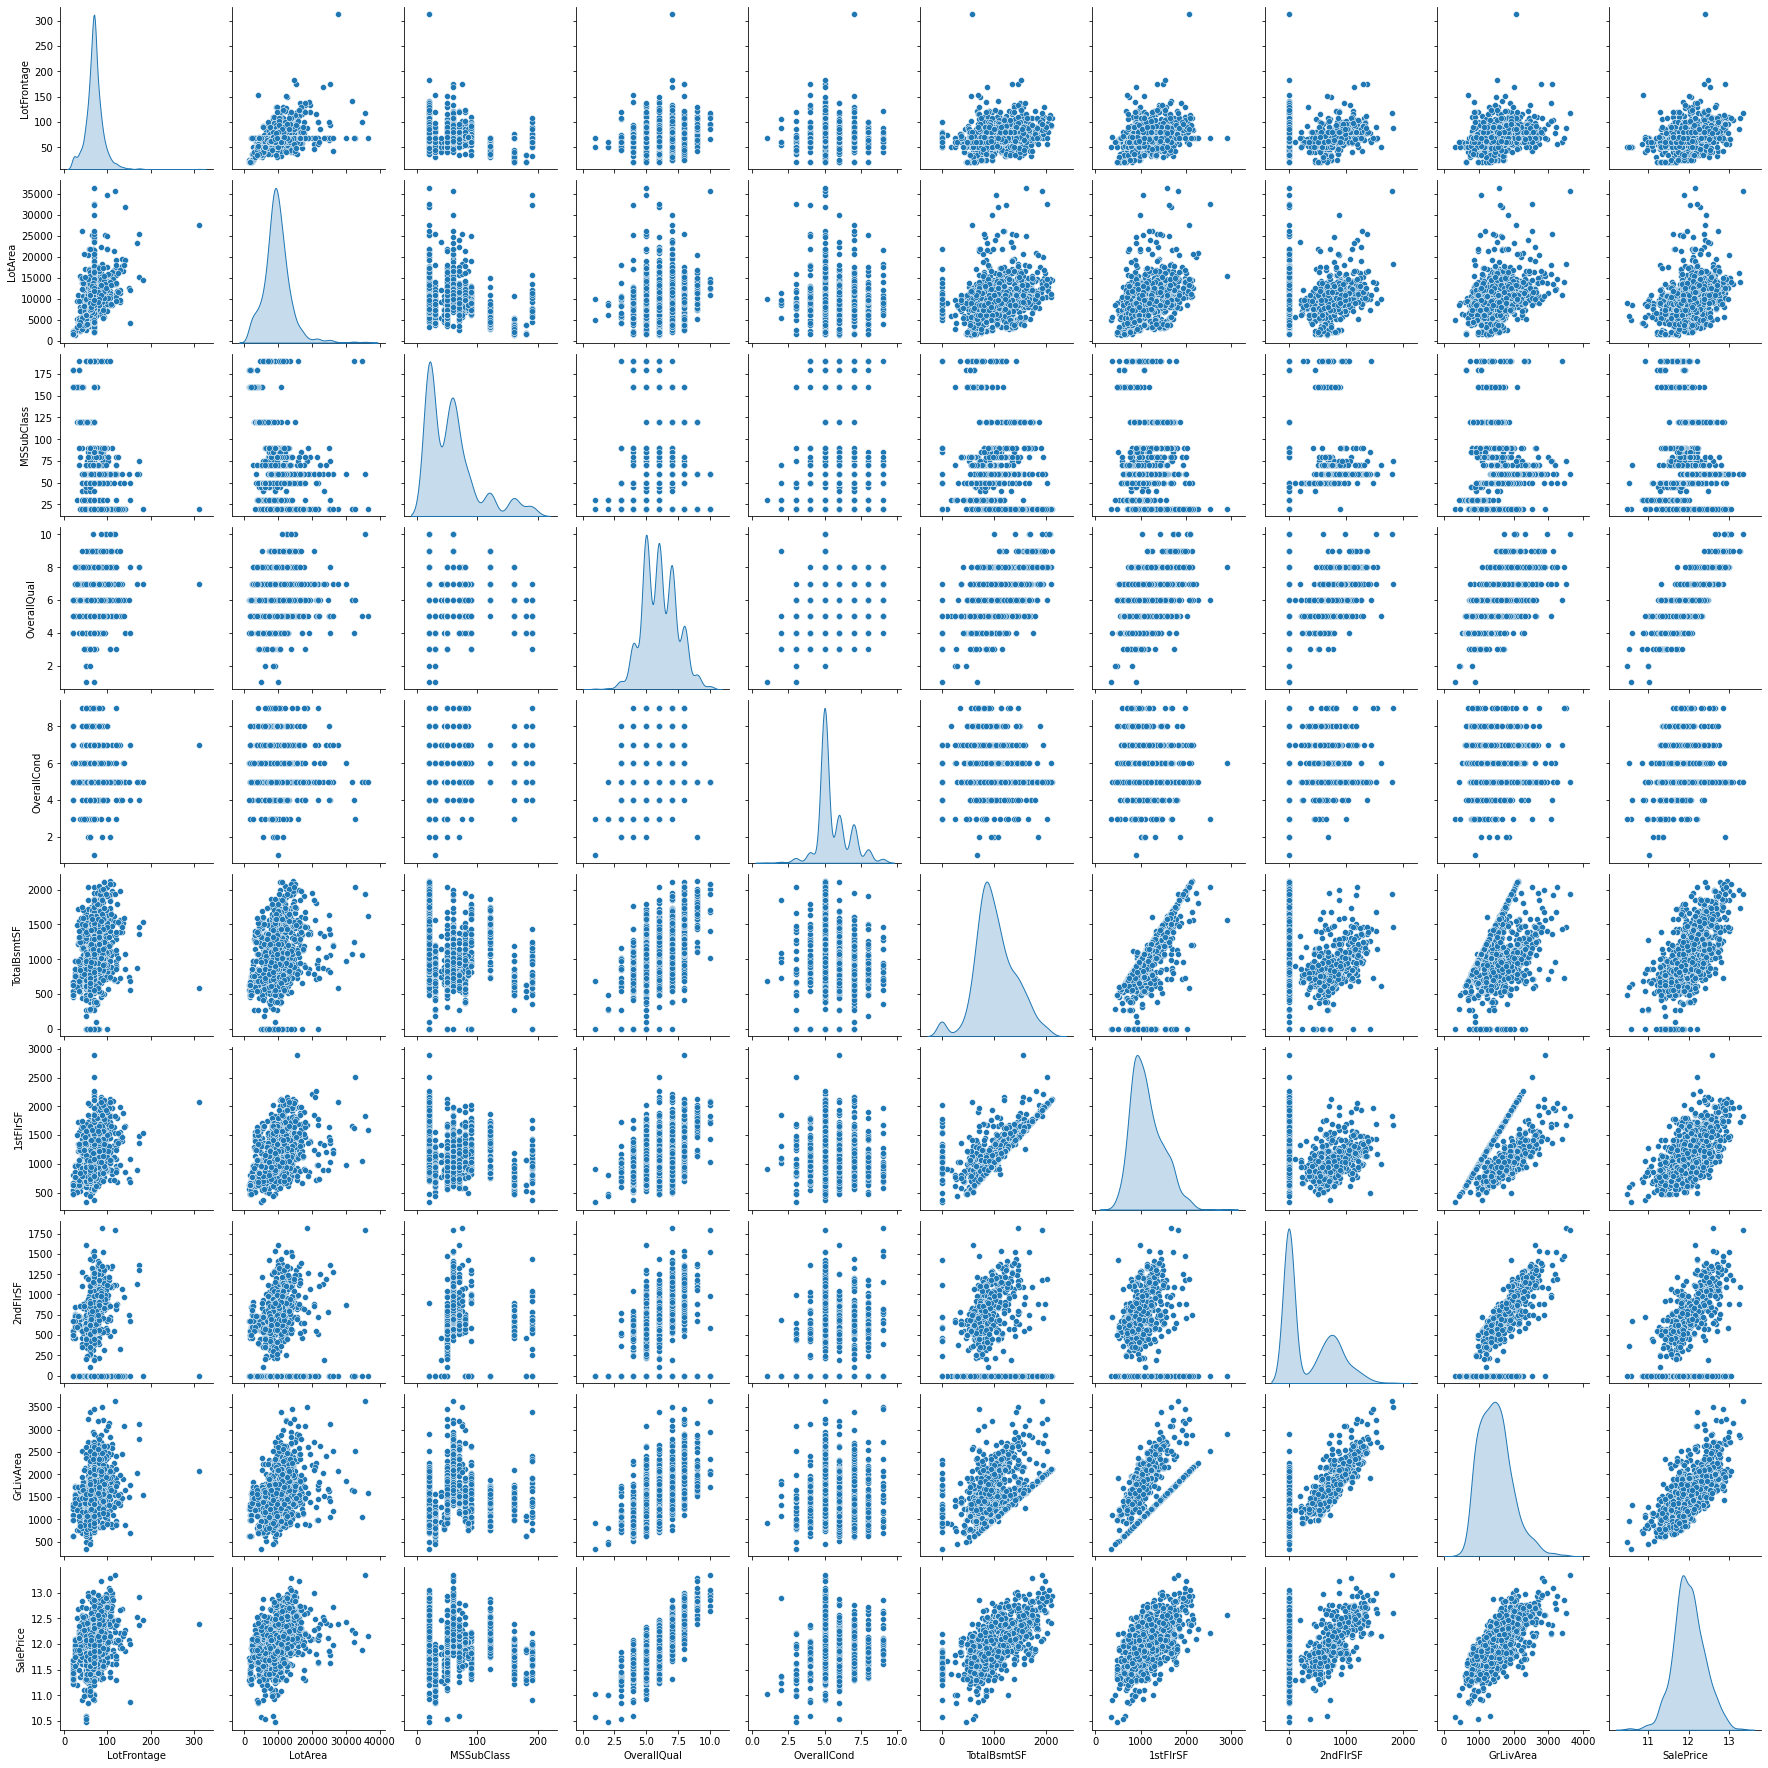

In [173]:
# Check the numerical values using pairplots

houseNum1=houseDf[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

houseNum2=houseDf[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',               
'OpenPorchSF','SalePrice']]

sns.pairplot(houseNum1, diag_kind='kde')
plt.show()

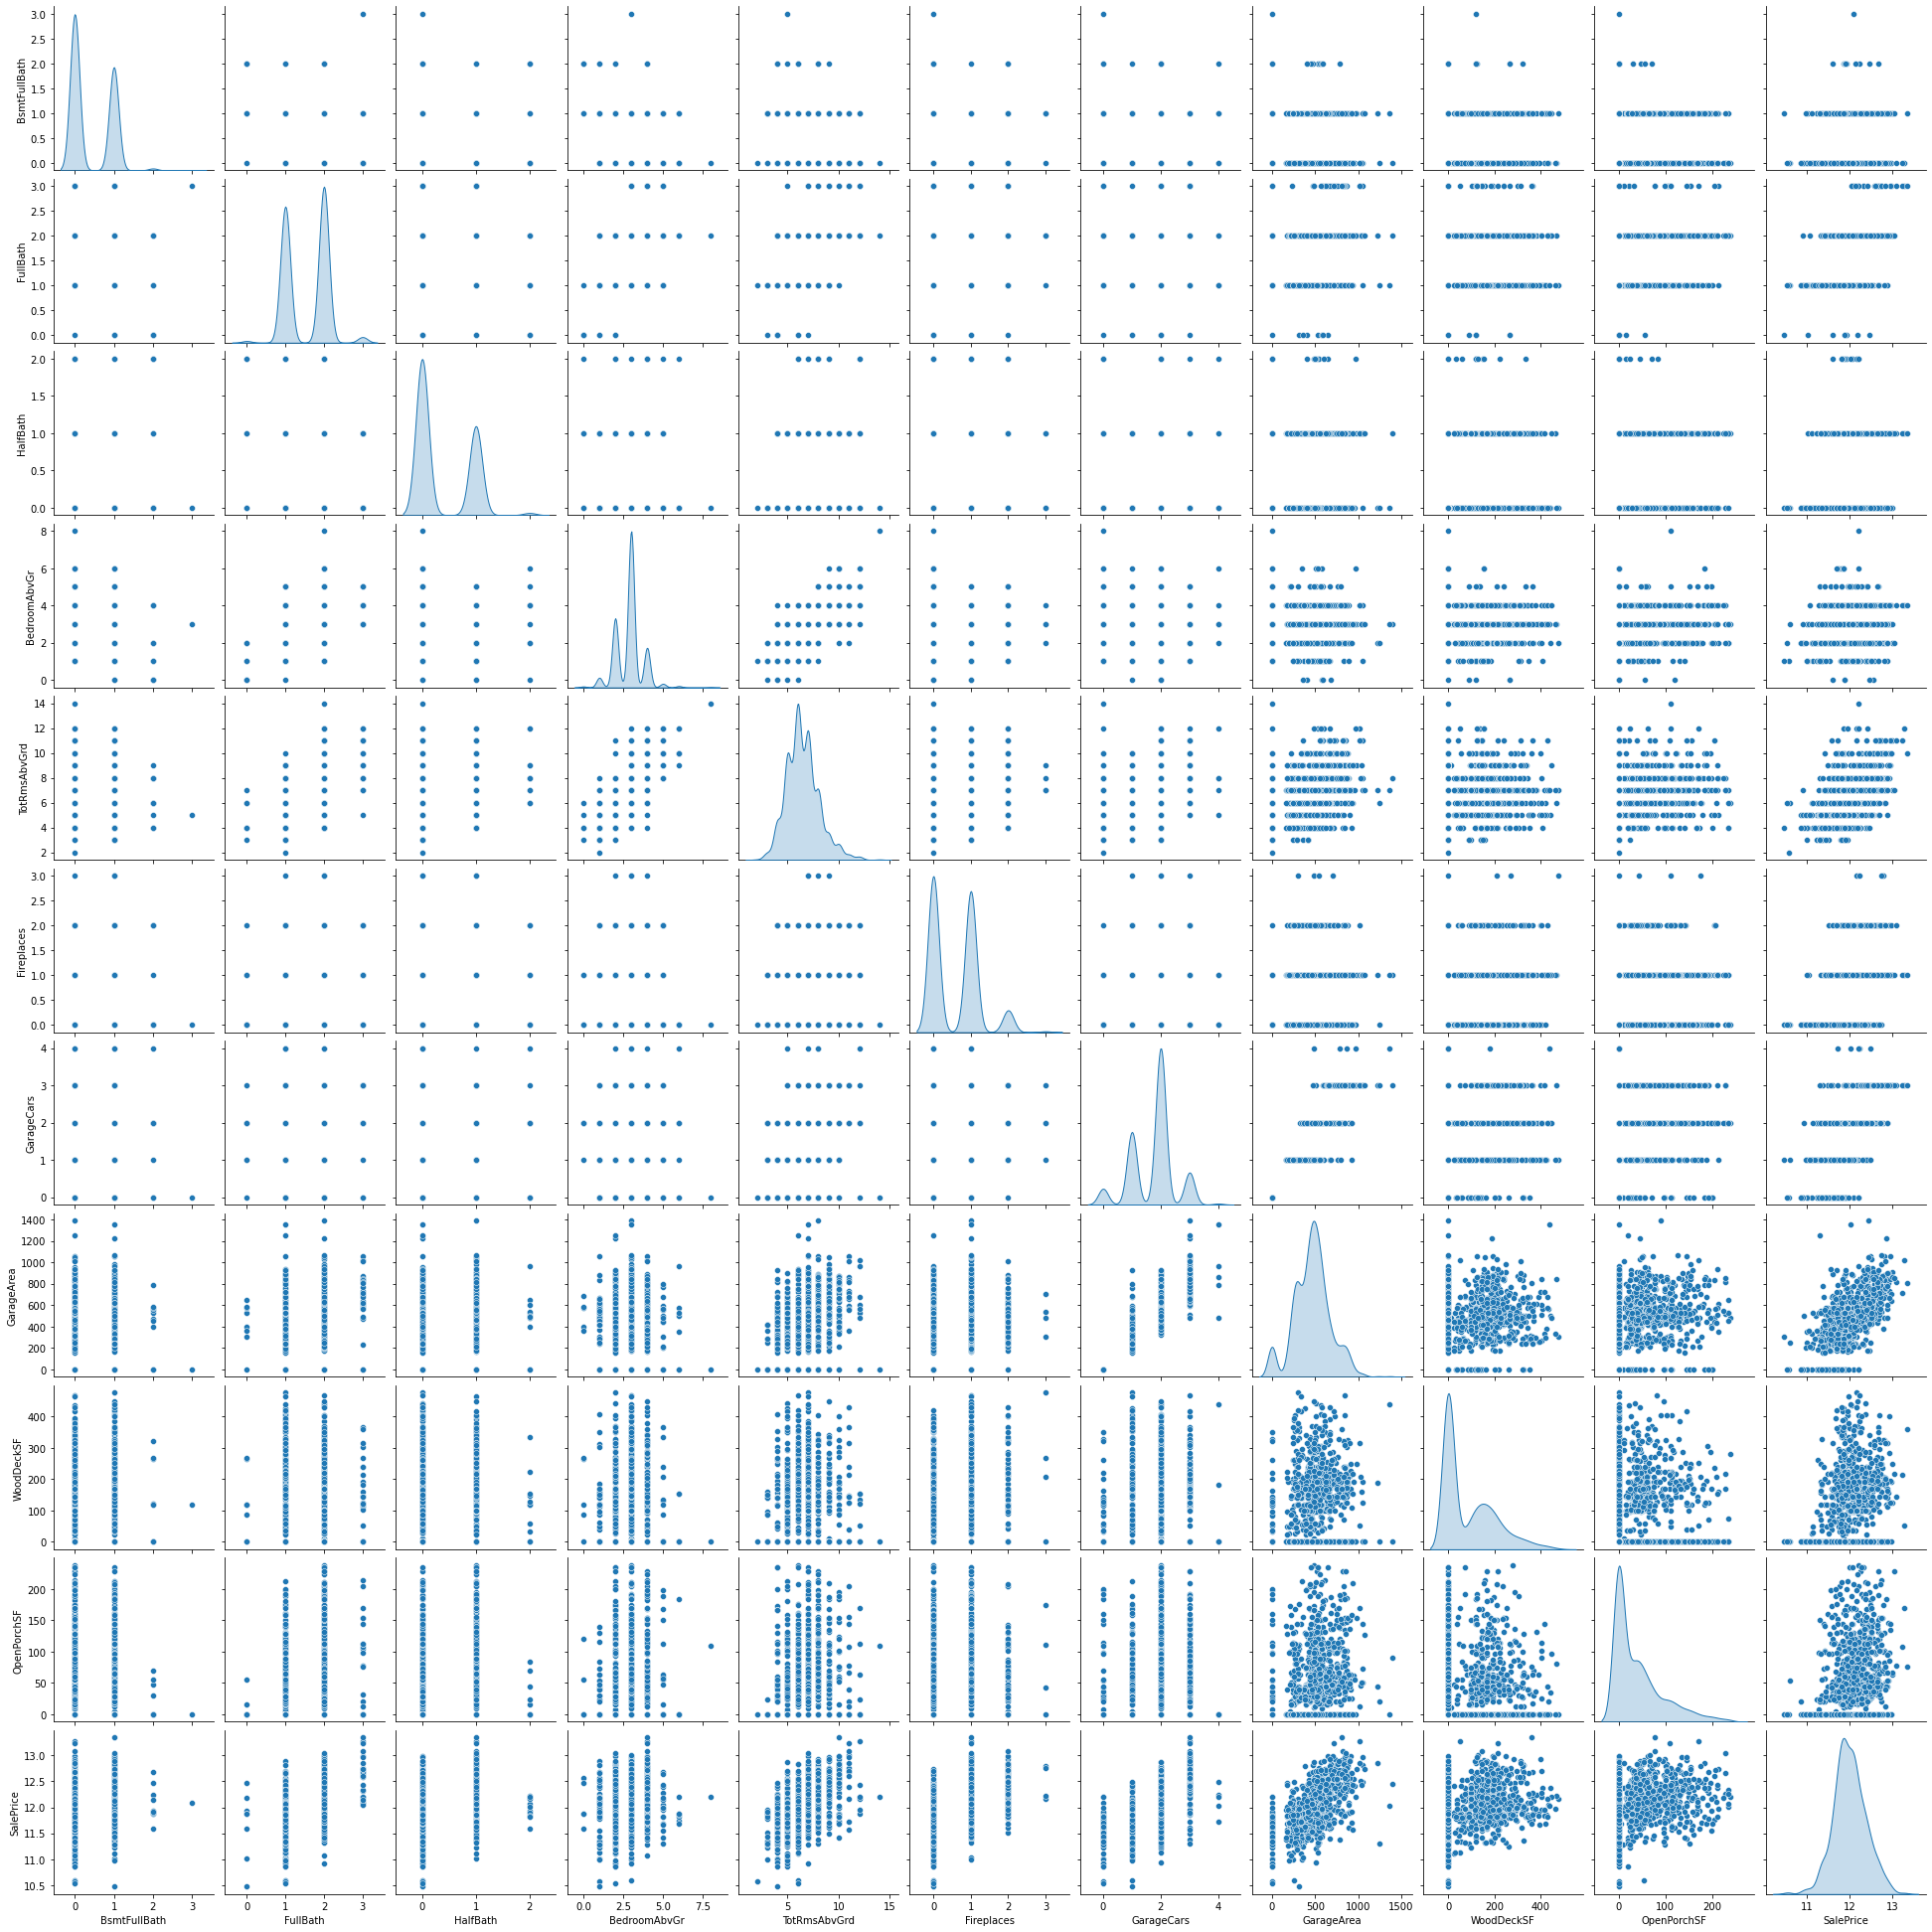

In [174]:
sns.pairplot(houseNum2, diag_kind='kde')
plt.show()

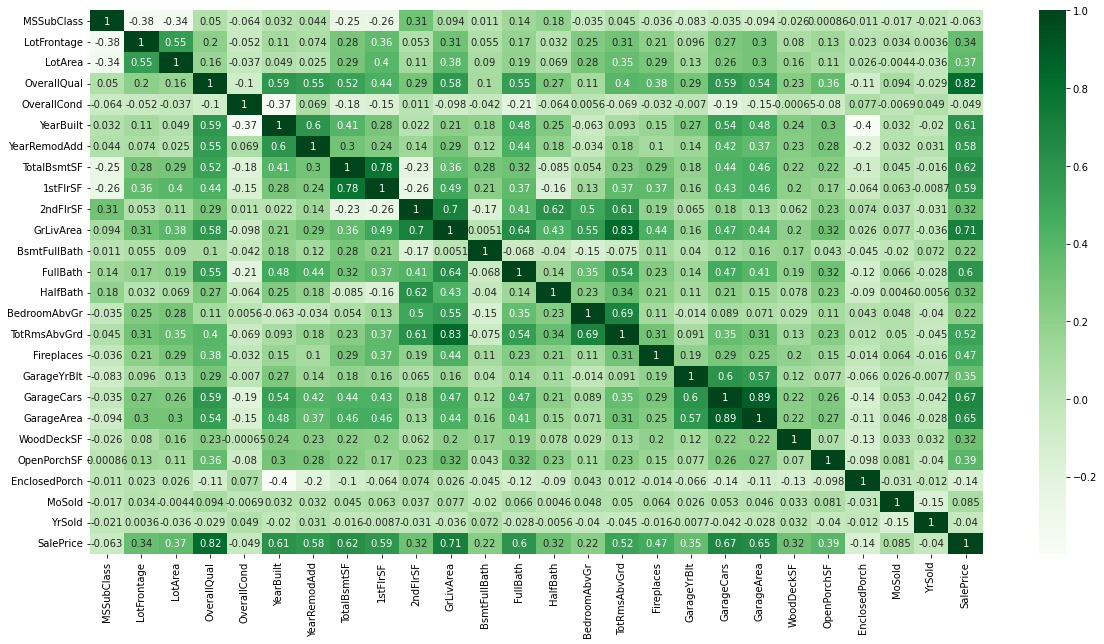

In [175]:
plt.figure(figsize=(20,10))
sns.heatmap(houseDf.corr(), annot=True, cmap="Greens")
plt.show()

Removing following columns which shows high correlation
    - TotRmsAbvGrd and GrLivArea show 83%
    - Garage Cars and Garage area shows 89%

In [176]:
# removing the highly correlated variables
houseDf.drop(['TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)
houseDf.shape

(1386, 49)

In [177]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1386 non-null   int64  
 1   MSZoning       1386 non-null   object 
 2   LotFrontage    1386 non-null   float64
 3   LotArea        1386 non-null   int64  
 4   LotShape       1386 non-null   object 
 5   LandContour    1386 non-null   object 
 6   LotConfig      1386 non-null   object 
 7   Neighborhood   1386 non-null   object 
 8   Condition1     1386 non-null   object 
 9   BldgType       1386 non-null   object 
 10  HouseStyle     1386 non-null   object 
 11  OverallQual    1386 non-null   int64  
 12  OverallCond    1386 non-null   int64  
 13  YearBuilt      1386 non-null   int64  
 14  YearRemodAdd   1386 non-null   int64  
 15  RoofStyle      1386 non-null   object 
 16  Exterior1st    1386 non-null   object 
 17  Exterior2nd    1386 non-null   object 
 18  MasVnrTy

### newly derived columns

In [178]:
houseDf[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [179]:
# Create new column named IsRemodelled - this column can determine whether the house has been remodelled 
# or not based on the difference between remodelled and built year

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2


houseDf["IsRemodelled"] = houseDf.apply(checkRemodel, axis=1)
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,61,0,No Fence,2,2008,WD,Normal,12.247699,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,298,0,0,No Fence,5,2007,WD,Normal,12.109016,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,42,0,No Fence,9,2008,WD,Normal,12.317171,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,35,272,No Fence,2,2006,WD,Abnorml,11.849405,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,192,84,0,No Fence,12,2008,WD,Normal,12.429220,0


In [180]:
# create new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

houseDf['BuiltOrremodelAge'] = houseDf.apply(funBuiltOrRemodelAge, axis=1)
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrremodelAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,61,0,No Fence,2,2008,WD,Normal,12.247699,0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,No Fence,5,2007,WD,Normal,12.109016,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,42,0,No Fence,9,2008,WD,Normal,12.317171,1,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,35,272,No Fence,2,2006,WD,Abnorml,11.849405,1,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,84,0,No Fence,12,2008,WD,Normal,12.429220,0,8


In [181]:
# Create a new column which would indicate if the Garage is old or new. 
# Garage year built less than 2000 will be considered as old(0) else new(1). 
# For GarageYrBuilt, where we have imputed the value 0 will also be treated as old.

def GarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1990 and row < 2000:
        return 0
    else:
        return 1

houseDf["OldOrNewGarage"] = houseDf['GarageYrBlt'].apply(GarageConstructionPeriod)
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrremodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,No Fence,2,2008,WD,Normal,12.247699,0,5,1
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,No Fence,5,2007,WD,Normal,12.109016,0,31,1
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,No Fence,9,2008,WD,Normal,12.317171,1,6,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,272,No Fence,2,2006,WD,Abnorml,11.849405,1,36,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,No Fence,12,2008,WD,Normal,12.429220,0,8,1


In [182]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can 
# use the derived columns for further analysis

houseDf.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis=1, inplace=True)
houseDf.shape

(1386, 48)

In [183]:
houseDf[['ExterQual','BsmtQual','BsmtCond', 'HeatingQC',  'KitchenQual','GarageFinish', 'ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,Gd,Gd,TA,Ex,Gd,RFn,TA,Reg
1,TA,Gd,TA,Ex,TA,RFn,TA,Reg
2,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1
3,TA,TA,Gd,Gd,Gd,Unf,TA,IR1
4,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1


#### Changing the type to category and labeling the values:

In [184]:
houseDf['ExterQual'] = houseDf['ExterQual'].astype('category')
houseDf['BsmtQual'] = houseDf['BsmtQual'].astype('category')
houseDf['BsmtCond'] = houseDf['BsmtCond'].astype('category')
houseDf['HeatingQC'] = houseDf['HeatingQC'].astype('category')
houseDf['KitchenQual'] = houseDf['KitchenQual'].astype('category')
houseDf['GarageFinish'] = houseDf['GarageFinish'].astype('category')
#houseDf['GarageQual'] = houseDf['GarageQual'].astype('category')
houseDf['ExterCond'] = houseDf['ExterCond'].astype('category')
houseDf['LotShape'] = houseDf['LotShape'].astype('category')
houseDf['Neighborhood'] = houseDf['Neighborhood'].astype('category')
houseDf['ExterQual'] = houseDf.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDf['BsmtQual'] = houseDf.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseDf['BsmtCond'] = houseDf.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseDf['HeatingQC'] = houseDf.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDf['KitchenQual'] = houseDf.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDf['FireplaceQu'] = houseDf['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
houseDf['GarageFinish'] = houseDf.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
#houseDf['GarageQual'] = houseDf.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseDf['ExterCond'] = houseDf.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDf['LotShape'] = houseDf.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
houseDf['Fence'] = houseDf['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [185]:
#columns change to numerical
houseDf[['ExterQual','BsmtQual','BsmtCond', 'HeatingQC',  'KitchenQual','GarageFinish', 'ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,3,4,3,4,3,2,2,3
1,2,4,3,4,2,2,2,3
2,3,4,3,4,3,2,2,0
3,2,3,4,3,3,1,2,0
4,3,4,3,4,3,2,2,0


In [186]:
# categorical columns
houseDf[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

,MSZoning,LandContour,LotConfig,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Neighborhood,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
1,RL,Lvl,FR2,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Veenker,Attchd,WD,Normal
2,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
3,RL,Lvl,Corner,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Crawfor,Detchd,WD,Abnorml
4,RL,Lvl,FR2,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,NoRidge,Attchd,WD,Normal


In [187]:
#neighbpurhood column
houseDf["Neighborhood"].value_counts()
houseDf.shape

(1386, 48)

In [188]:
houseDummy = pd.get_dummies(houseDf[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
            'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

houseNew = pd.concat([houseDf, houseDummy], axis='columns')

print(houseNew.shape)
# dropping the actual variables after getting the dummys
houseNew = houseNew.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
print(houseNew.shape)

(1386, 163)
(1386, 148)


In [189]:
houseNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 481.9 KB


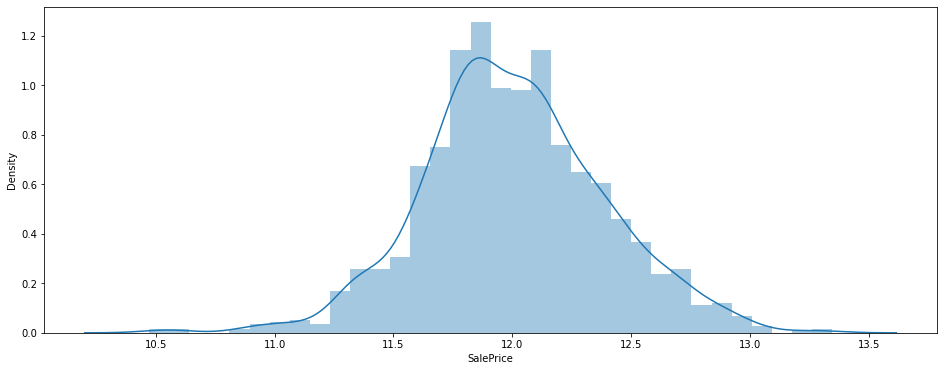

In [190]:
#lets plot the distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(houseNew.SalePrice)
plt.show()

# Creating train and test dataset for validation purpose

### Split the data into two parts
    1. Train Data
    2. Test Data

In [191]:
house_train, house_test = train_test_split(houseNew, train_size=0.7, test_size= 0.3, random_state=100)

print(house_train.shape)
print(house_train.info())
house_train.head()


(970, 148)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 952 to 834
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 315.2 KB
None


,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
952,85,60.0,7200,3,5,8,2,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1178,50,54.0,7681,0,5,6,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0
564,60,69.0,13346,0,7,5,3,2,4,3,...,1,0,0,0,0,0,0,0,0,0
1039,180,21.0,1477,3,4,4,2,2,4,3,...,0,0,0,0,0,0,0,0,0,0
515,20,94.0,12220,3,10,5,4,2,5,3,...,0,1,0,0,0,0,0,0,0,0


In [192]:
print(house_test.shape)
print(house_test.info())
house_test.head()

(416, 148)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 685 to 494
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 136.1 KB
None


,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
685,160,69.0,5062,0,7,5,3,2,4,3,...,0,0,0,0,0,0,0,1,0,0
1136,50,80.0,9600,3,6,5,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0
1025,20,70.0,7700,3,5,5,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0
1333,50,60.0,7200,3,5,6,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0
1102,20,70.0,7000,3,5,7,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0


In [193]:
houseNew[['MSSubClass','SalePrice','LotArea','OverallQual','OverallCond', 'TotalBsmtSF','1stFlrSF','2ndFlrSF',
        'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr', 'Fireplaces','GarageCars',
        'WoodDeckSF','OpenPorchSF','EnclosedPorch']]

,MSSubClass,SalePrice,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,60,12.247699,8450,7,5,856,856,854,1710,1,2,1,3,0,2,0,61,0
1,20,12.109016,9600,6,8,1262,1262,0,1262,0,2,0,3,1,2,298,0,0
2,60,12.317171,11250,7,5,920,920,866,1786,1,2,1,3,1,2,0,42,0
3,70,11.849405,9550,7,5,756,961,756,1717,1,1,0,3,1,3,0,35,272
4,60,12.429220,14260,8,5,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,12.128117,7500,7,5,1221,1221,0,1221,1,2,0,2,0,2,0,113,0
1455,60,12.072547,7917,6,5,953,953,694,1647,0,2,1,3,1,2,0,40,0
1456,20,12.254868,13175,6,6,1542,2073,0,2073,1,2,0,3,2,2,349,0,0
1457,70,12.493133,9042,7,9,1152,1188,1152,2340,0,2,0,4,2,1,0,60,0


#### Scalling the train dataset

In [194]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond', 'TotalBsmtSF','1stFlrSF','2ndFlrSF',
        'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr', 'Fireplaces','GarageCars',
        'WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice']

scaler = StandardScaler()
house_train[num_col] = scaler.fit_transform(house_train[num_col])
house_test[num_col] = scaler.transform(house_test[num_col])

print(house_test["SalePrice"])
print(house_train["SalePrice"])


685     0.611652
1136   -0.835468
1025   -0.981661
1333   -0.697051
1102   -0.507135
          ...   
1054    1.148152
899    -0.507135
342    -1.635754
1002    0.902129
494    -1.525109
Name: SalePrice, Length: 416, dtype: float64
952    -0.528429
1178   -0.149251
564     1.277567
1039   -1.868986
515     2.338442
          ...   
844    -0.166108
55      0.248834
366    -0.081257
83     -0.676394
834    -0.413411
Name: SalePrice, Length: 970, dtype: float64


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

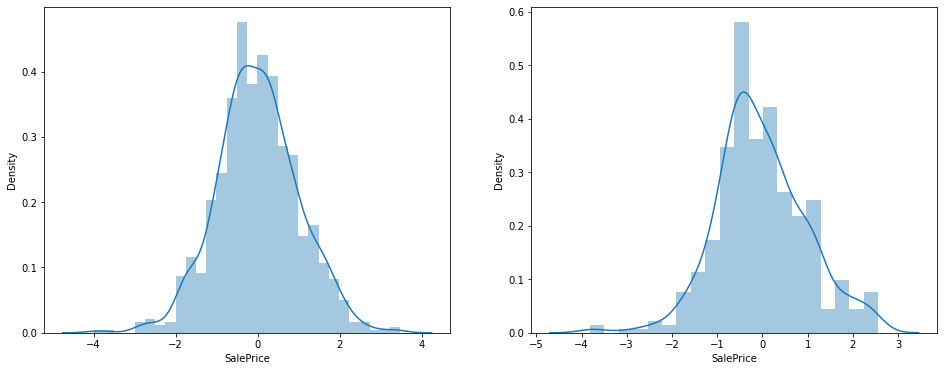

In [195]:

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_train.SalePrice)
plt.subplot(122)
sns.distplot(house_test.SalePrice)

#### Fixing target variables / independent and dependent variables

In [196]:
X_train = house_train
y_train = house_train.pop('SalePrice')

X_test = house_test
y_test = house_test.pop('SalePrice')

# Linear Regression

### RFE
    - Since there are 148 features we will use RFE to get best 50 of them

In [197]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running rfe
rfe = RFE(lm, n_features_to_select= 50)
rfe = rfe.fit(X_train, y_train)


In [198]:

y_LR_Pred = lm.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9341275980709298
63.89622987119805
0.06587240192907015
0.032936200964535076


Text(0.5, 0, 'Errors')

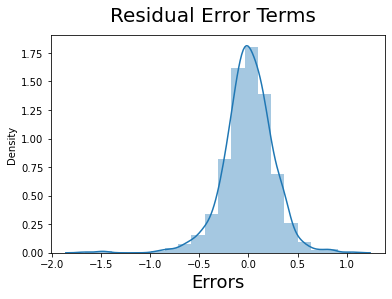

In [199]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

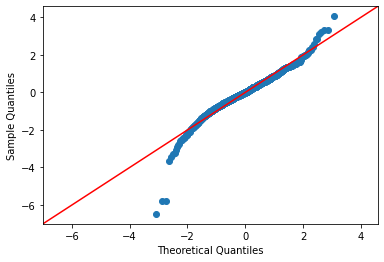

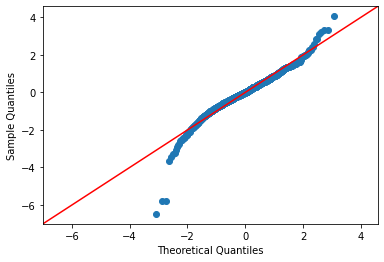

In [200]:
sm.qqplot(res, fit=True,line='45')

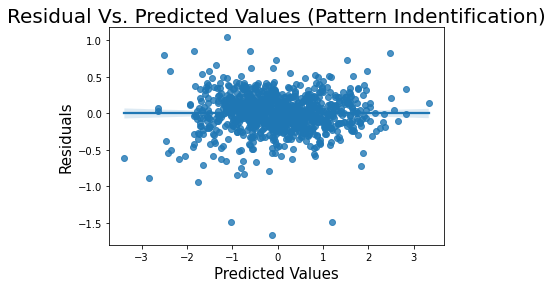

In [201]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [202]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,TotalBsmtSF,True,1
2,GrLivArea,True,1
3,KitchenQual,True,1
4,MSZoning_FV,True,1
5,MSZoning_RH,True,1
6,MSZoning_RL,True,1
7,MSZoning_RM,True,1
8,Condition1_Norm,True,1
9,Condition1_RRAn,True,1


In [203]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

### Ridge Regression Model

In [204]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [205]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.6}


In [206]:
#fit the data to ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.26141571  0.16931668  0.32569958  0.22364087  0.71852816  0.36295684
  0.52811339  0.35189828  0.15291829  0.20605911  0.19050884 -0.31163941
 -0.15762624 -0.3195037   0.26918107 -0.44050158 -0.43895852 -0.41167969
 -0.38620681 -0.21028216 -1.04556796  0.23194665  0.37927853  0.16490332
  0.31393089  0.26461338  0.19211806  0.2594881   0.25470393  0.32635067
  0.15016434  0.41233029  0.28004091  0.47903218  0.26988664  0.27980097
  0.24544371 -0.20611196  0.17111006  0.39326965  0.2316382   0.17111006
  0.31510358 -0.21106099 -0.3212956   0.22600889  0.24401148 -0.17074647
  0.33779867  0.45196626]


In [207]:

# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.6,-0.246038,-0.264528,1
9,0.7,-0.246237,-0.264528,2
7,0.5,-0.245825,-0.264553,3
10,0.8,-0.246421,-0.264553,4
11,0.9,-0.246613,-0.264601,5
6,0.4,-0.245599,-0.264602,6
12,1.0,-0.246800,-0.264644,7
5,0.3,-0.245343,-0.264672,8
4,0.2,-0.245065,-0.264777,9
13,2.0,-0.248419,-0.264903,10


In [208]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.8921329804068455
r2_test:
0.865168887738586
RSS_train:
104.63100900535986
RSS_test:
55.259705898928416
MSE_train:
0.10786701959315449
MSE_test:
0.1328358314878087


- Even though R2 score test train showing good values but the ridge regression considere so many predictors into count

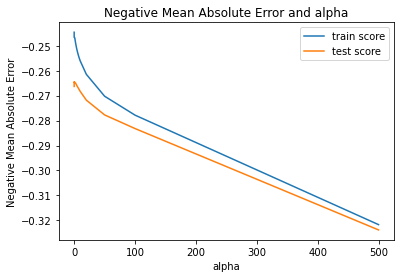

In [209]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [210]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.2614
1,TotalBsmtSF,0.1693
2,GrLivArea,0.3257
3,KitchenQual,0.2236
4,MSZoning_FV,0.7185
5,MSZoning_RH,0.3630
6,MSZoning_RL,0.5281
7,MSZoning_RM,0.3519
8,Condition1_Norm,0.1529
9,Condition1_RRAn,0.2061


In [211]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,MSZoning_RH,0.718528
7,MSZoning_RM,0.528113
34,GarageType_Detchd,0.479032
32,GarageType_Basment,0.412330
40,SaleCondition_Normal,0.393270
23,Exterior2nd_Brk Cmn,0.379279
6,MSZoning_RL,0.362957
8,Condition1_Norm,0.351898
49,Neighborhood_Veenker,0.337799
30,Exterior2nd_Wd Sdng,0.326351


## Lasso Regression

In [212]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.885364329225305
0.8637510068077454


In [213]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [214]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [215]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [216]:
lasso.coef_

array([ 0.26056685,  0.16956124,  0.32580548,  0.22259033,  0.77255011,
        0.41088231,  0.57675596,  0.39636511,  0.15214464,  0.20196655,
        0.1831528 , -0.31347711, -0.15713714, -0.3181824 ,  0.26871961,
       -0.49752018, -0.50329588, -0.46783014, -0.44976172, -0.24850901,
       -1.27209746,  0.22758457,  0.39107691,  0.24797448,  0.31220366,
        0.2613008 ,  0.18482699,  0.25591252,  0.24914674,  0.32428792,
        0.14629679,  0.41516681,  0.28331776,  0.48256886,  0.27201333,
        0.27073088,  0.22819774, -0.19676822,  0.13043329,  0.39964814,
        0.22698284,  0.20574045,  0.31578261, -0.19849426, -0.3179223 ,
        0.22531318,  0.24503181, -0.16621414,  0.33910994,  0.46096477])

In [217]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.8923429376222192
r2_test:
0.8652632296970091
RSS_train:
104.42735050644737
RSS_test:
55.221040424847935
MSE_train:
0.10765706237778079
MSE_test:
0.13274288563665368


In [218]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013494,0.003033,0.001009,9.344062e-07,0.0001,{'alpha': 0.0001},-0.259285,-0.248665,-0.259511,-0.280548,...,-0.265542,0.012539,1,-0.246743,-0.249587,-0.246925,-0.241718,-0.239818,-0.244958,0.003617
1,0.002722,0.000387,0.001119,2.001665e-04,0.0010,{'alpha': 0.001},-0.259292,-0.248399,-0.258222,-0.284843,...,-0.266894,0.014698,2,-0.252272,-0.256504,-0.254908,-0.248082,-0.247759,-0.251905,0.003524
2,0.002004,0.000019,0.001002,3.069239e-05,0.0100,{'alpha': 0.01},-0.276654,-0.274262,-0.290086,-0.296491,...,-0.290612,0.014965,3,-0.286086,-0.290238,-0.284920,-0.281209,-0.277925,-0.284076,0.004214
3,0.002011,0.000037,0.000781,3.922494e-04,0.1000,{'alpha': 0.1},-0.333237,-0.349400,-0.336822,-0.332776,...,-0.341831,0.009654,4,-0.340694,-0.342522,-0.340991,-0.337899,-0.335048,-0.339431,0.002651
4,0.002199,0.000397,0.001000,7.155100e-06,0.2000,{'alpha': 0.2},-0.374373,-0.401424,-0.376965,-0.369083,...,-0.384592,0.013852,5,-0.385343,-0.379353,-0.385813,-0.382717,-0.378615,-0.382368,0.002967


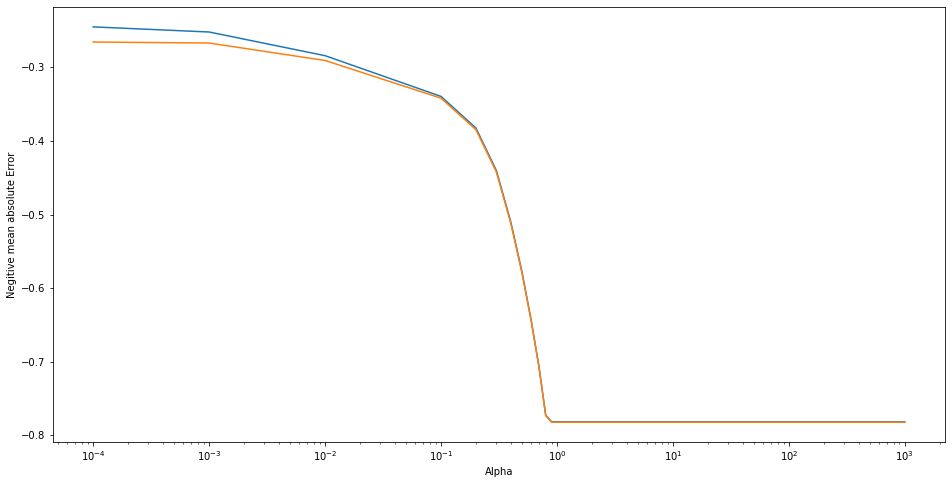

In [219]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [220]:
#checking for the alpha 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.885364329225305
0.8637510068077454


In [221]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = house_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
34,MSZoning_RL,0.411470
5,OverallCond,0.370260
32,MSZoning_FV,0.349273
3,LotShape,0.322156
50,Condition1_RRNn,0.303014
1,LotFrontage,0.288192
43,Condition1_Feedr,0.273031
49,Condition1_RRNe,0.227589
4,OverallQual,0.223846
7,ExterCond,0.216681


In [222]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.2882
1,TotalBsmtSF,0.1757
2,GrLivArea,0.3222
3,KitchenQual,0.2238
4,MSZoning_FV,0.3703
5,MSZoning_RL,0.2167
6,Condition1_Norm,0.1211
7,Condition1_RRAn,0.0974
8,BldgType_Twnhs,-0.2532
9,BldgType_TwnhsE,-0.1095


In [223]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select= 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [224]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df

,Features,rfe_support,rfe_ranking,Coefficient
8,GarageType_BuiltIn,True,1,0.411470
3,MSZoning_FV,True,1,0.370260
7,GarageType_Attchd,True,1,0.349273
1,GrLivArea,True,1,0.322156
14,Neighborhood_Veenker,True,1,0.303014
0,OverallQual,True,1,0.288192
11,Neighborhood_Crawfor,True,1,0.273031
13,Neighborhood_StoneBr,True,1,0.227589
2,KitchenQual,True,1,0.223846
4,MSZoning_RL,True,1,0.216681


### Comparing results from both Ridge and Lasso analysis

In [225]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.892133,0.892343
1,R2Score Test,0.865169,0.865263
2,RSS Train,104.631009,104.427351
3,RSS Test,55.259706,55.221040
4,MSE Train,0.107867,0.107657
5,MSE Test,0.132836,0.132743


R2 score is very similar in both ridge and Lasso but RSS train have some fluctualtions


#### After comparing both we can say that below features best explains the dataset

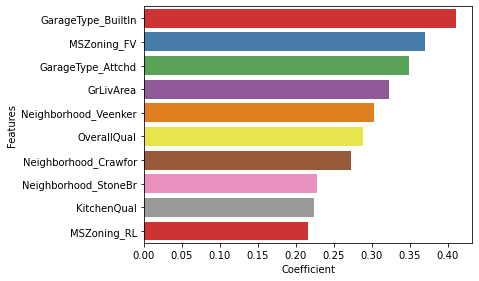

In [226]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()

# Conclusion:

##### significant variables in predicting the price of a house and how well those variables describe  the price of a house:

- MSZoning_FV :Floating Village Residential also has significant effect in the sales price.
- GrLivArea :Above grade (ground) living area square feet also has significant increase in the sales price.
- MSZoning_RL : Residential Low Density is good then it will also has significant effect on sales price.
- OverallQual : Quality of over all house also has significant increase in the sales price.
- Foundation_PConc: Poured Contrete foundation has also significant impact on the sales price
- TotalBsmtSF :Total square feet of basement area is also a reason to increase in salesprice
- OverallCond : If the Overall Condition is Excellent the SalePrice is higher
- SaleCondition_Normal: Normal Sale when compared to othersales has an improvement in the sales price
- Neighborhood_NridgHt
- Neighborhood_Crawfor: Neighbourhod Crawford and Northridge Heights also place a role in increase the sales price.

###### if they concentrating/investing on these variables well they can notice significant increase in Sales price.

##### optimal alpha/lamda value for Ridge and Lasso:
1. Ridge - 0.6
2. Lasso - 0.0001

##### The Mean Squared error:
1. Ridge - 0.10787
2. Lasso - 0.10766

The mean squared error of Ridge is slightly lower than that of lasso

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality , condition of the house, Foundation type of the house, Total basement area in square feet,neighbourhood etc

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

# Quetion 1:

In [227]:
# Ridge regression
ridge = Ridge(alpha=0.12)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.25860583  0.16913958  0.32640946  0.22319823  0.79216656  0.43850061
  0.59573858  0.42000031  0.15454367  0.21092849  0.20162342 -0.3182398
 -0.16124589 -0.35445581  0.27225935 -0.54402309 -0.56087289 -0.51423716
 -0.50760571 -0.32468295 -1.27679383  0.23264083  0.43495907  0.26743497
  0.32840939  0.27287171  0.20709782  0.26659012  0.26175932  0.33560438
  0.15609476  0.41798254  0.2941094   0.48621538  0.27616833  0.29832146
  0.26468324 -0.21523761  0.16961117  0.42540588  0.22952446  0.16961117
  0.31881179 -0.19897926 -0.3299082   0.22963652  0.25079417 -0.16783486
  0.3466411   0.46735706]


In [228]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.8924618554872786
r2_test:
0.8647667544692903
RSS_train:
104.31200017733968
RSS_test:
55.42451775741379
MSE_train:
0.10753814451272133
MSE_test:
0.133232013839937


In [229]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.2586
1,TotalBsmtSF,0.1691
2,GrLivArea,0.3264
3,KitchenQual,0.2232
4,MSZoning_FV,0.7922
5,MSZoning_RH,0.4385
6,MSZoning_RL,0.5957
7,MSZoning_RM,0.4200
8,Condition1_Norm,0.1545
9,Condition1_RRAn,0.2109


In [230]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
5,MSZoning_RH,0.792167
7,MSZoning_RM,0.595739
34,GarageType_Detchd,0.486215
6,MSZoning_RL,0.438501
23,Exterior2nd_Brk Cmn,0.434959
40,SaleCondition_Normal,0.425406
8,Condition1_Norm,0.420000
32,GarageType_Basment,0.417983
49,Neighborhood_Veenker,0.346641
30,Exterior2nd_Wd Sdng,0.335604


- Here we have got zoning, Condition1, Saletype condition, Exterio

In [231]:
# Lasso Regression:

lm = Lasso(alpha=0.0002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8916742296702017
0.8658717311099812


In [232]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.8916742296702017
r2_test:
0.8658717311099812
RSS_train:
105.07599721990431
RSS_test:
54.97164984610133
MSE_train:
0.10832577032979826
MSE_test:
0.1321433890531282


In [233]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.2649
1,TotalBsmtSF,0.1700
2,GrLivArea,0.3246
3,KitchenQual,0.2223
4,MSZoning_FV,0.6896
5,MSZoning_RH,0.3184
6,MSZoning_RL,0.4996
7,MSZoning_RM,0.3143
8,Condition1_Norm,0.1485
9,Condition1_RRAn,0.1894


- Here we have 20 features

In [234]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select= 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [235]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.855111
4,MSZoning_RL,True,1,0.653617
3,MSZoning_RH,True,1,0.503044
14,Neighborhood_Veenker,True,1,0.479240
5,MSZoning_RM,True,1,0.478114
13,SaleType_Oth,True,1,0.448841
1,GrLivArea,True,1,0.327046
0,OverallQual,True,1,0.256271
6,HouseStyle_2.5Fin,True,1,-0.382278
11,RoofStyle_Shed,True,1,-0.452015


### Comparing Ridge and Lasso after doublling the alpha value

In [236]:
#Comparing results of Ridge and Lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.892462,0.891674
1,R2Score Test,0.864767,0.865872
2,RSS Train,104.312000,105.075997
3,RSS Test,55.424518,54.971650
4,MSE Train,0.107538,0.108326
5,MSE Test,0.133232,0.132143


Here Lasso given the very close result of R2 score for both test and train. The most important feature after double the value of alpha is

- MSZoning_FV
- MSZoning_RL
- MSZoning_RH
- Neighborhood_Veenker
- MSZoning_RM
- SaleType_Oth
- GrLivArea
- OverallQual
- HouseStyle_2.5Fin
- RoofStyle_Shed

# Quetion 2

The values I got during the assignment for ridge and lasso are 0.6 and 0.0001.
Based on alpha/lamda values I have got, Ridge regression does not have zero value for any co efficient,
Whereas Lasso nearly zeroed for one or two co efficient, So Lasso is better option and it also helps in eliminating some of the features. So I would choose Lasso.


# Quetion 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [237]:
houseLasso = houseNew
houseLasso = houseLasso.drop(["GarageType_BuiltIn", "MSZoning_FV", "GarageType_Attchd", "GrLivArea", "Neighborhood_Veenker"], axis=1)

In [238]:
df_train, df_test = train_test_split(houseLasso, train_size=0.7,test_size = 0.3, random_state=100)

In [240]:
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [241]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [242]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select= 50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [243]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,TotalBsmtSF,True,1
3,1stFlrSF,True,1
4,2ndFlrSF,True,1
5,GarageCars,True,1
6,MSZoning_RL,True,1
7,Condition1_Norm,True,1
8,Condition1_PosN,True,1
9,Condition1_RRAn,True,1


In [244]:
# Assign the 50 columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

### perform lasso to new model

In [245]:
# Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.8921617821650614
0.877297726710645


In [246]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)

0.8921617821650614
0.877297726710645
15.441590070370587
7.423669752536181
0.015919165021000607
0.017845359982058127


In [247]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.246473
29,BuiltOrremodelAge,0.115667
5,OverallCond,0.114206
4,OverallQual,0.101200
7,ExterCond,0.092966
1,LotFrontage,0.085528
49,BldgType_2fmCon,0.071877
3,LotShape,0.069560
2,LotArea,0.058420
6,ExterQual,0.057541


After removing the five most important features we have got new top 5 features as "MSSubClass", "BuiltOrremodelAge", "OverallCond", "OverallQual", "ExterCond"